We use this notebook to make sure that the Time Machine does not throw errors on common data types.

In [1]:
using IJuliaTimeMachine
TM = IJuliaTimeMachine

IJuliaTimeMachine

In [2]:
x = 1
x1 = BigInt(1)
x2 = BigFloat(1.0)
x3 = 2//2

1//1

In [3]:
v = randn(4)
m = randn(4,4)
t = randn(4,4,4)

4×4×4 Array{Float64,3}:
[:, :, 1] =
  0.978296     0.198225   1.74711   -0.727369
 -1.4505      -0.962365  -0.298152   0.476303
 -1.1067       0.59163    0.58354    1.93112
  0.00927694  -0.558384  -0.186031  -0.689835

[:, :, 2] =
 -0.174082  -1.70713    0.902173   0.334837
  0.602617   2.1164    -0.478422   0.413218
 -0.183238   0.153962   0.206024   0.320583
 -0.265256  -1.23044    1.09301   -0.161803

[:, :, 3] =
  0.710372   0.307021   0.908663  -0.436548
 -0.723568  -1.76186    0.695012  -0.205642
 -0.564125  -0.387687   0.117783   0.750233
 -0.816124   1.28379   -0.894417   0.907216

[:, :, 4] =
 -0.422302   0.981787   0.855356  -0.881019
 -0.30978   -1.6838    -0.505701   0.534756
 -1.23512   -0.762382   0.369727   0.244943
  1.16964   -0.463252   0.45071   -0.862174

In [4]:
f = open("test.txt","w")

IOStream(<file test.txt>)

In [5]:
TM.can_copy_and_hash(f)

(false, 0)

In [6]:
close(f)

In [7]:
using DataFrames

In [8]:
DF = DataFrames

DataFrames

In [9]:
TM.can_copy_and_hash(DF)

(false, 0)

In [10]:
df = DataFrame(A = 1:4, B = ["M", "F", "F", "M"])

,A,B
,Int64,String
1,1,M
2,2,F
3,3,F
4,4,M


In [11]:
TM.can_copy_and_hash(df)

(true, 0x0158a4840f6f282a)

In [12]:
di = Dict()
di["a"] = "hi there"
di["b"] = di

Dict{Any,Any} with 2 entries:
  "b" => Dict{Any,Any}(#= circular reference @-1 =#)
  "a" => "hi there"

In [13]:
TM.can_copy_and_hash(di)

(true, 0x650b61de1b4120f3)

In [14]:
tup = (1, 2, "three")
TM.can_copy_and_hash(tup)

(true, 0x3c7e5719f96b0437)

In [15]:
ntup = (a = 3, b = "hi")
@show ntup.a, ntup.b
TM.can_copy_and_hash(ntup)

(ntup.a, ntup.b) = (3, "hi")


(true, 0x24396107c58629f8)

In [17]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


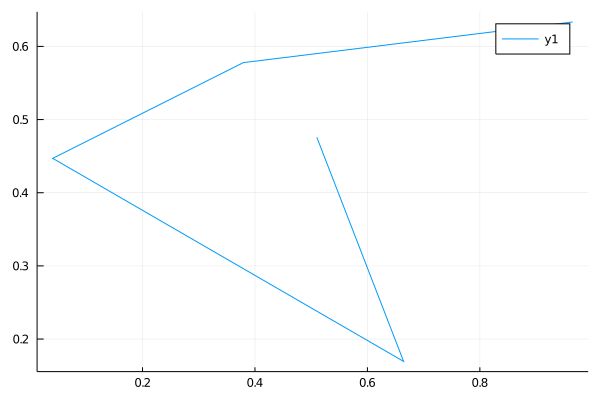

In [18]:
p = plot(rand(5), rand(5))

In [19]:
vars(IJulia.n - 1)

Dict{Any,Any} with 12 entries:
  :p    => Plot{Plots.GRBackend() n=1}
  :df   => 4×2 DataFrame…
  :di   => Dict{Any,Any}("b"=>Dict{Any,Any}(#= circular reference @-1 =#),"a"=>…
  :x    => 1//1
  :ntup => (a = 3, b = "hi")
  :v    => [-1.28918, 0.871712, 1.27456, -0.657655]
  :tup  => (1, 2, "three")
  :x3   => 1//1
  :x1   => 1
  :m    => [-1.05695 -1.48253 -1.38155 0.436513; -1.68435 0.701055 -1.35064 -0.…
  :x2   => 1.0
  :t    => [0.978296 0.198225 1.74711 -0.727369; -1.4505 -0.962365 -0.298152 0.…

In [20]:
p = []

Any[]

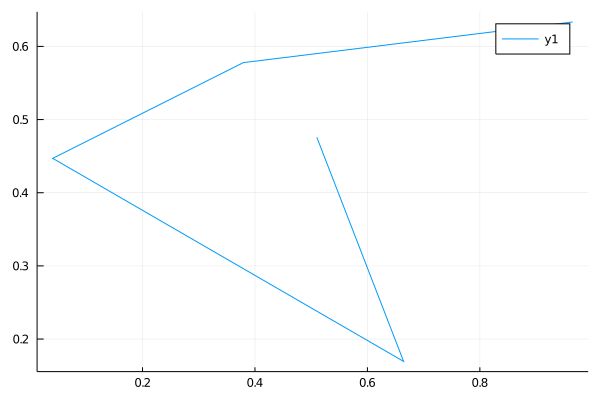

In [21]:
vars(18)[:p]